<a href="https://colab.research.google.com/github/JEEEEEEESU/Ai_project_Mini_Pandas/blob/main/LRP_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [2]:
!pip install innvestigate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import innvestigate
import innvestigate.utils
import numpy as np
import matplotlib.pyplot as plt
import PIL

from keras.applications import vgg16, imagenet_utils

In [4]:
import keras

In [5]:
image_path = 'husky.jpg'

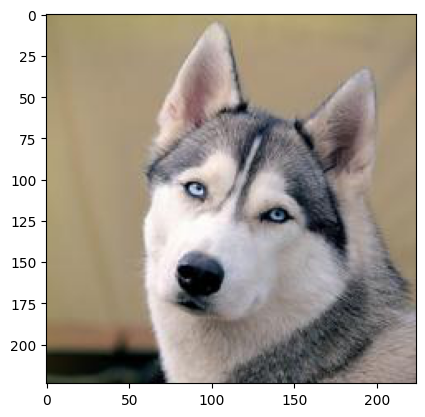

In [6]:
img = PIL.Image.open(image_path)
img = img.resize((224,224))
plt.imshow(img)
plt.show()

In [7]:
# 3차원 이미지를 CNN 학습이 가능하도록 batch 추가된 4차원 배열로 전처리(preprocessing)
img_array = np.array(img)
img_array = img_array[np.newaxis, :] # batch diment(배치차원)
img_array = img_array.astype(np.float)
img_array = imagenet_utils.preprocess_input(img_array) # 이미지를 채널별로 normalize함.

<ipython-input-7-760a1f04bb5a>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_array = img_array.astype(np.float)


In [8]:
img_array.shape

(1, 224, 224, 3)

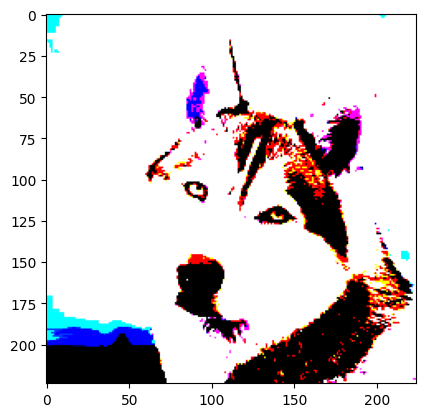

In [9]:
plt.imshow(img_array[0]) # imshow는 3차원까지만 시각화 가능하여 (224,224,3)차원을 시각화
plt.show() #RGB 3channel을 사용하여 표현

In [10]:
#VGG모델로 학습된 모델을 불러와 softmax를 통과하지 않은 (without) 값을 불러옴
model = vgg16.VGG16()
model = innvestigate.model_wo_softmax(model) 

In [11]:
#deep taylor 방식을 활용한 분석기(analyer)를 생성하고 적용함.
analyzer = innvestigate.create_analyzer("deep_taylor", model)
a = analyzer.analyze(img_array)

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


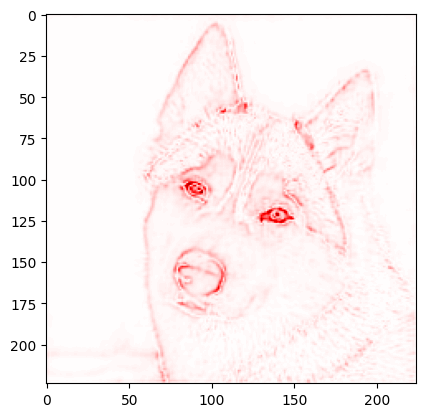

In [12]:
# 3개인 color 채널을 다시 한개로 통합함.
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))

# 값을 [-1, 1] 사이로 정규화함
a /= np.max(np.abs(a))

# 결과물을 출력
plt.imshow(a[0], cmap='seismic', clim=(-1, 1)) #heatmap형식으로 출력하도록 'seismic'설정